In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/ensai/imatag/website_categorization_custom/categorization/Datasets/Feature_dataset_2023-02-08_clean_full_meta.csv")
df = df.drop("Unnamed: 0", axis = 1)

In [7]:
import charade
def detect(s):
     
    try:
        # check it in the charade list
        if isinstance(s, str):
            return charade.detect(s.encode())
        # detecting the string
        else:
            return charade.detect(s)
     
    # in case of error
    # encode with 'utf -8' encoding
    except UnicodeDecodeError:
        return charade.detect(s.encode('utf-8'))

In [12]:
detect(df['metadescription'][4])

{'encoding': 'utf-8', 'confidence': 0.99}

In [3]:
df.head()

,url,main_category,main_category_confidence,tld,tokens,metadescription
0,http://0calc.com,Science,0.5606,com,"['web', 'scientif', 'calcul', 'regist', 'login...",['Free Online Scientific Notation Calculator. ...
1,http://100diet.net,Health,0.5991,net,"['diet', 'net', 'diet', 'net', 'javascript', '...",['Подробные описания самых эффективных диет с ...
2,http://1091.co.jp,Sports,0.5912,jp,"['w', 'h', 'x', 'co', 'jp', 'h', 'iupdat', 'e'...",['\x92Þ\x82è\x91D\x81E\x91D\x8fh\x92T\x82µ\x82...
3,http://10bet.com,Gambling,0.7795,com,"['bet', 'bet', 'onlin', 'sport', 'bet', 'welco...",['Exciting bets and live online sports betting...
4,http://1111.com.tw,Career_and_Education,0.7671,tw,"['hi', 'q', 'line', 'app', 'hi', 'q', 'line', ...",['1111人力銀行替求職者及求才企業精選全職、兼職、工讀實習等多元工作媒合！並提供各種求職...


In [15]:
df.main_category.value_counts()

Food_and_Drink              691
Health                      613
Autos_and_Vehicles          455
Beauty_and_Fitness          436
Sports                      425
Books_and_Literature        402
Reference                   393
People_and_Society          348
Law_and_Government          318
Finance                     310
Computer_and_Electronics    302
Gambling                    294
Internet_and_Telecom        251
Business_and_Industry       246
Science                     245
Travel                      216
News_and_Media              199
Games                       188
Career_and_Education        182
Shopping                    172
Arts_and_Entertainment      141
Recreation_and_Hobbies      126
Pets_and_Animals            116
Adult                        46
Home_and_Garden              37
Name: main_category, dtype: int64

In [17]:
import ast

def convert_to_list(row):
    return ast.literal_eval(row['metadescription'])

In [18]:
df['metadescription'] = df.apply(convert_to_list, axis = 1)

In [19]:
data = []
for index,row in df.iterrows():
    data.append({"class":row["main_category"], "meta":row["metadescription"]})

words = []
classes = []
documents = []

In [42]:
data_tokens = [data[i]['meta'][0] for i in range(len(data))]

In [39]:
import itertools

In [40]:
data_tokens = list(itertools.chain(*data_tokens))

In [43]:
len(data_tokens)

7152

In [44]:
len(data)

7152

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=10000)
X = matrix.fit_transform(data_tokens).toarray()

In [46]:
y = [data[i]['class'] for i in range(len(data))]

In [47]:
count = pd.Series(y).value_counts()

In [48]:
count

Food_and_Drink              691
Health                      613
Autos_and_Vehicles          455
Beauty_and_Fitness          436
Sports                      425
Books_and_Literature        402
Reference                   393
People_and_Society          348
Law_and_Government          318
Finance                     310
Computer_and_Electronics    302
Gambling                    294
Internet_and_Telecom        251
Business_and_Industry       246
Science                     245
Travel                      216
News_and_Media              199
Games                       188
Career_and_Education        182
Shopping                    172
Arts_and_Entertainment      141
Recreation_and_Hobbies      126
Pets_and_Animals            116
Adult                        46
Home_and_Garden              37
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [51]:
accuracy

0.4211409395973154

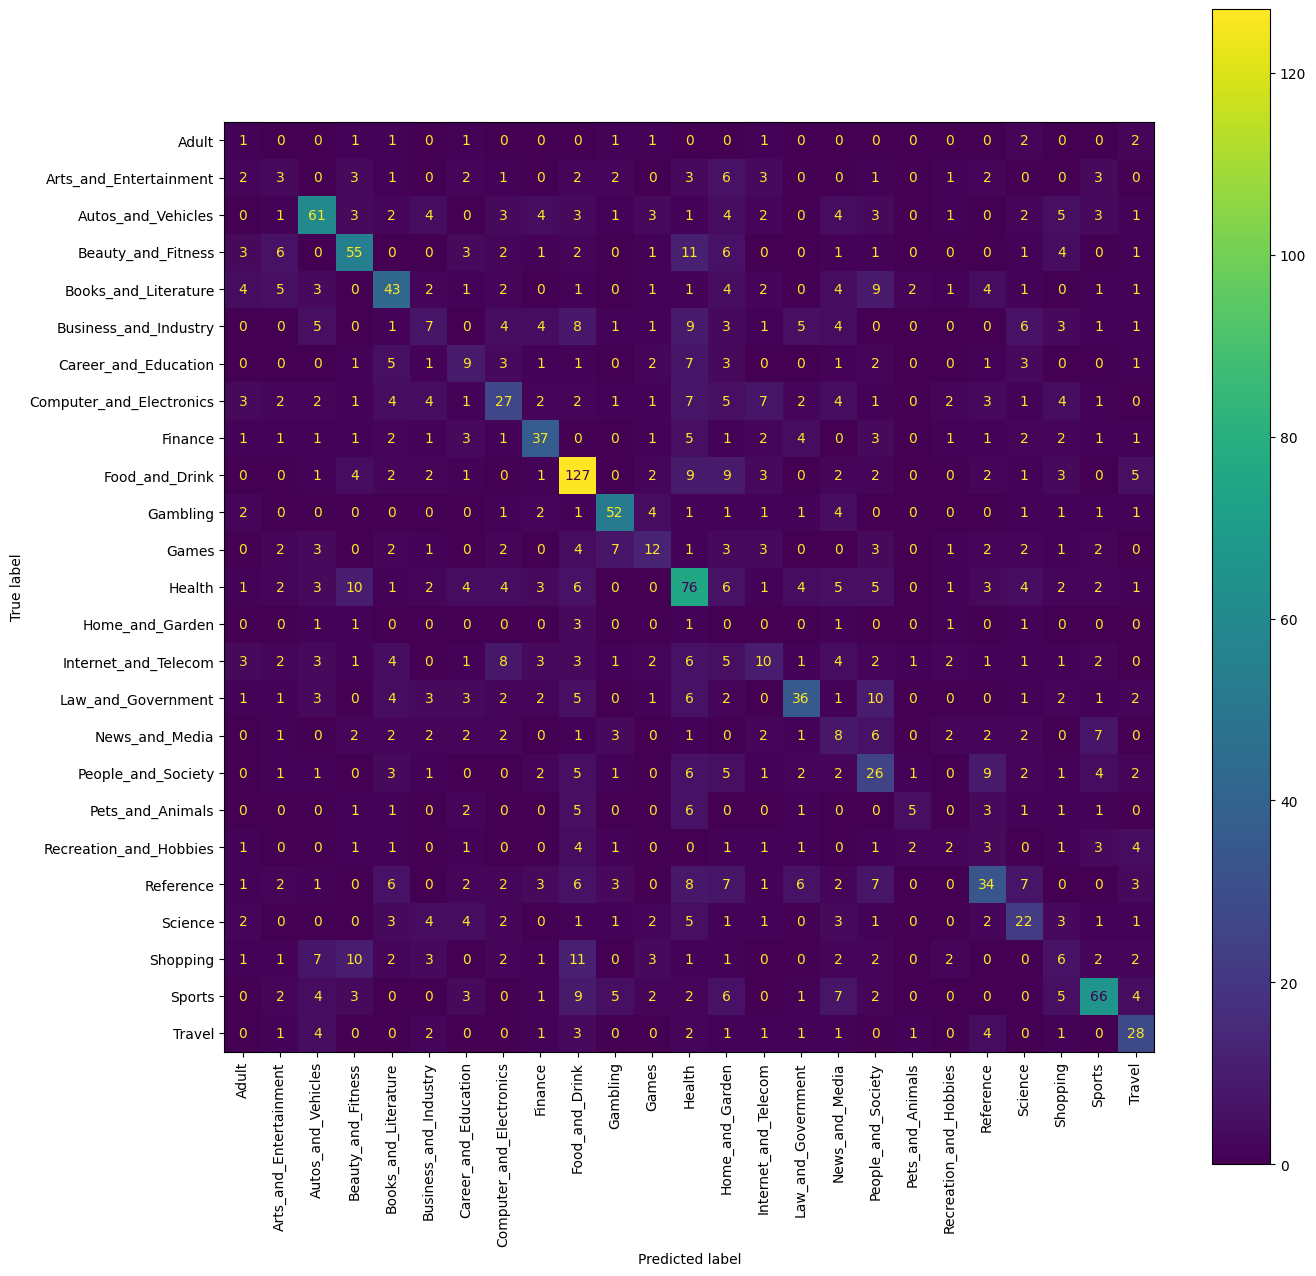

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred,xticks_rotation='vertical')

fig = cm_display.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(15)  

plt.show() 